<a href="https://colab.research.google.com/github/yashx007/ML/blob/main/A4_Bank_Note_Auth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation Matrix:
           variance  skewness  curtosis   entropy     Class
variance  1.000000  0.263333 -0.380358  0.276666 -0.724655
skewness  0.263333  1.000000 -0.786729 -0.526896 -0.444281
curtosis -0.380358 -0.786729  1.000000  0.319219  0.155346
entropy   0.276666 -0.526896  0.319219  1.000000 -0.023200
Class    -0.724655 -0.444281  0.155346 -0.023200  1.000000


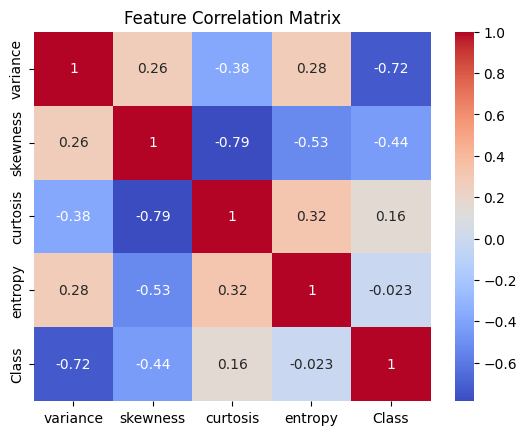

Accuracy: 0.9781818181818182
Confusion Matrix:
 [[143   5]
 [  1 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.96      0.99      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
path = '/content/data_banknote_authentication.xlsx'
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']
df = pd.read_excel(path, names=columns)

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Splitting features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
